In [104]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "../data/city_data.csv"
ride_data_to_load = "../data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df,
                                 how='left', on='city')

# Rename type to city type
combined_df = combined_df.rename(columns={"type":"city_type"})

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,city_type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

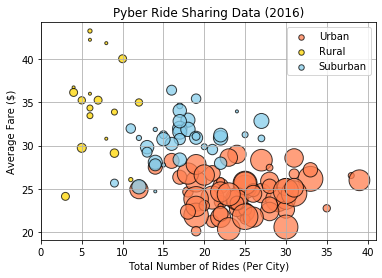

In [106]:
# Obtain the x and y coordinates for each of the three city types
rides_avg = combined_df.groupby('city').count()['fare']
x_limit_min = rides_avg.min()
x_limit_max = rides_avg.max()
avg_fare = combined_df.groupby('city').mean()['fare']
# x_limit
y_limit_min = avg_fare.min()
y_limit_max = avg_fare.max()
# y_limit


# Grab x and y for urban
urban_data = combined_df[combined_df.city_type == 'Urban']
urban_rides_x = urban_data.groupby('city').count()['fare'] 
urban_fares_y = urban_data.groupby('city').mean()['fare'] 
urban_size = urban_data.groupby('city').mean()['driver_count']
# urban_size = urban_data.loc[4]
# urban_size = urban_data.loc[row_indexer,column_indexer]
# urban_size = urban_data['driver_count']

# Grab x and y for Rural
rural_data = combined_df[combined_df.city_type == 'Rural']
rural_rides_x = rural_data.groupby('city').count()['fare'] 
rural_fares_y = rural_data.groupby('city').mean()['fare'] 
rural_size = rural_data.groupby('city').mean()['driver_count']
# rural_size = rural_data['driver_count']

# Grab x and y for Suburban
suburban_data = combined_df[combined_df.city_type == 'Suburban']
suburban_rides_x = suburban_data.groupby('city').count()['fare'] 
suburban_fares_y = suburban_data.groupby('city').mean()['fare'] 
suburban_size = suburban_data.groupby('city').mean()['driver_count']
# suburban_size = suburban_data['driver_count']

# Build the scatter plots for each city types
#allow three types to share plot

#urban
Urban = plt.scatter(urban_rides_x, urban_fares_y, marker="o", facecolors="coral", edgecolors="black",
            s=urban_size*9, alpha=0.75, label="Urban")

#rural
Rural = plt.scatter(rural_rides_x, rural_fares_y, marker="o", facecolors="gold", edgecolors="black",
            s=rural_size*9, alpha=0.75, label="Rural")

#suburban
Suburban = plt.scatter(suburban_rides_x, suburban_fares_y, marker="o", facecolors="skyblue", edgecolors="black",
            s=suburban_size*9, alpha=0.75, label="Suburban")
plt.scatter


# Incorporate the other graph properties

# Set your x and y limits
plt.xlim(0, x_limit_max+2)
plt.ylim(y_limit_min-1, y_limit_max+1)

#label x and y axis

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#add header
plt.title("Pyber Ride Sharing Data (2016)")

# Set a grid on the plot
plt.grid()


# Create and format legend
legend = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
legend.legendHandles[0]._sizes=[30]
legend.legendHandles[1]._sizes=[30]
legend.legendHandles[2]._sizes=[30]
# Incorporate a text label regarding circle size (see in above last part of plt.scattters)



# Save Figure
plt.savefig("../Pyber/PyberRideSharingData2016.png")

plt.show()


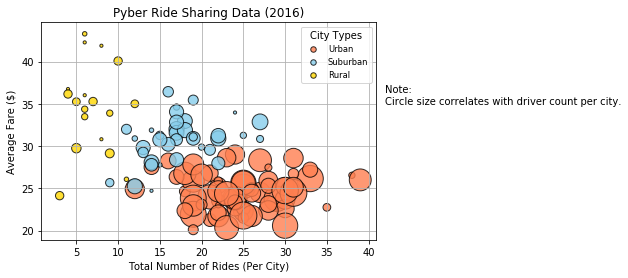

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

/Users/emilywehrmeyer/anaconda3/envs/pandas/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


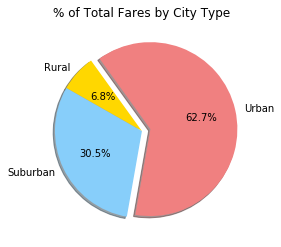

In [93]:
# Calculate Type Percents
#calculate total fares within data set
total_fares = combined_df['fare'].sum()
# total_fares

#Calculate percentage of total fares based on city type
urban_fares_perc = urban_data.groupby('city_type').sum()['fare']/total_fares*100
# urban_fares_perc
rural_fares_perc = rural_data.groupby('city_type').sum()['fare']/total_fares*100
# rural_fares_perc
suburban_fares_perc = suburban_data.groupby('city_type').sum()['fare']/total_fares*100
# suburban_fares_perc

# # Build Pie Chart
city_types = ["Urban", "Rural", "Suburban"]
Percent = [urban_fares_perc, rural_fares_perc, suburban_fares_perc]
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = [0.1,0,0]
plt.title("% of Total Fares by City Type")
plt.pie(Percent, explode=explode, labels=city_types, colors=colors,autopct="%1.1f%%", 
        shadow=True, startangle=-100)
# plt.axis('equal')
 
# Save Figure
plt.savefig("../Pyber/TotalFaresbyCityType.png")

plt.show()

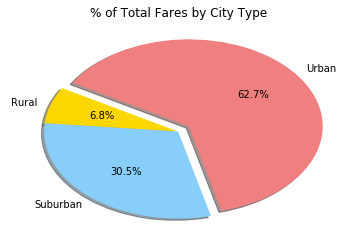

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

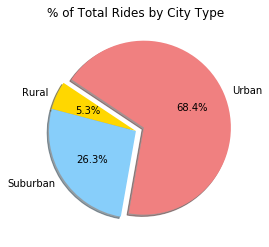

In [117]:
# Calculate Ride Percents
total_rides = combined_df['fare'].count()
# total_rides

#Calculate perceintage of rides per city type
urban_perc = urban_rides_x.sum()/total_rides*100
# urban_perc
rural_perc = rural_rides_x.sum()/total_rides*100
# rural_perc
suburban_perc = suburban_rides_x.sum()/total_rides*100
# suburban_perc

# # Build Pie Chart
city_types = ["Urban", "Rural", "Suburban"]
Percent = [urban_perc, rural_perc, suburban_perc]
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = [0.1,0,0]
plt.title("% of Total Rides by City Type")
plt.pie(Percent, explode=explode, labels=city_types, colors=colors,autopct="%1.1f%%", 
        shadow=True, startangle=-100)
# plt.axis('equal')

# Save Figure
plt.savefig("../Pyber/TotalRidesbyCityType.png")

#show figure
plt.show()

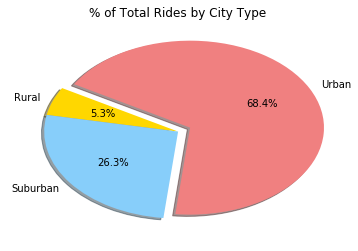

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

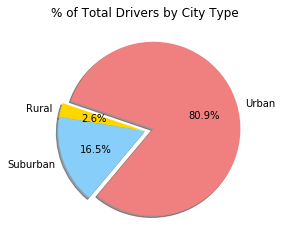

In [112]:
# Calculate total drivers
total_drivers = urban_size.sum()
# total_drivers

#Calculate perceintage of rides per city type
urban__driver_perc = urban_size.sum()/total_drivers*100
# urban__driver_perc
rural__driver_perc = rural_size.sum()/total_drivers*100
# rural__driver_perc
suburban__driver_perc = suburban_size.sum()/total_drivers*100
# suburban__driver_perc

# # Build Pie Chart
city_types = ["Urban", "Rural", "Suburban"]
Percent = [urban__driver_perc, rural__driver_perc, suburban__driver_perc]
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = [0.1,0,0]
plt.title("% of Total Drivers by City Type")
plt.pie(Percent, explode=explode, labels=city_types, colors=colors,autopct="%1.1f%%", 
        shadow=True, startangle=-130)
# plt.axis('equal')

# Save Figure
plt.savefig("../Pyber/TotalDriversbyCityType.png")

#show figure
plt.show()

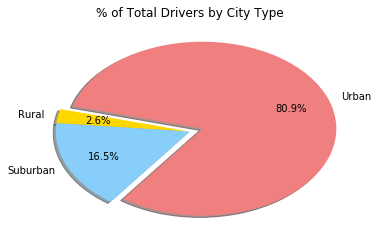

In [6]:
# Show Figure
plt.show()